In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [72]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
  

Question 1 - Extracting Tesla Stock Data Using yfinance 

In [35]:
tdata = yf.Ticker('TSLA')
tesla_data = tdata.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

t_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
t_response = requests.get(t_url).text
t_soup = BeautifulSoup(t_response, 'html.parser')
t_revenue_table = t_soup.find_all('table')[1]
t_data = []

for row in t_revenue_table.find_all('tr'):
    t_cells = row.find_all('td')
    if len(t_cells) > 1:
        date = t_cells[0].text.strip()
        revenue = t_cells[1].text.strip().replace('$', '').replace(',', '')
        
        if revenue == '':
            revenue = pd.NA
            
        t_data.append([date, revenue])

tesla_rev_df = pd.DataFrame(t_data[1:], columns=['Date', 'Revenue'])
tesla_rev_df.dropna(subset=['Revenue'], inplace=True)

In [65]:
tesla_rev_df.tail()

,Date,Revenue
47,2010-09-30,31
48,2010-06-30,28
49,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [63]:
gdata = yf.Ticker('GME')
gme_data = gdata.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping 

In [67]:
gs_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

gs_response = requests.get(gs_url).text
gs_soup = BeautifulSoup(gs_response, 'html.parser')
gs_revenue_table = gs_soup.find_all('table')[1]
gs_data = []

for row in gs_revenue_table.find_all('tr'):
    gs_cells = row.find_all('td')
    if len(gs_cells) > 1:
        gs_date = gs_cells[0].text.strip()
        gs_revenue = gs_cells[1].text.strip().replace('$', '').replace(',', '')
        
        if gs_revenue == '':
            gs_revenue = pd.NA
            
        gs_data.append([gs_date, gs_revenue])

gme_rev_df = pd.DataFrame(gs_data[1:], columns=['Date', 'Revenue'])
gme_rev_df.dropna(subset=['Revenue'], inplace=True)

In [69]:
gme_rev_df.tail()

,Date,Revenue
56,2006-01-31,1667
57,2005-10-31,534
58,2005-07-31,416
59,2005-04-30,475
60,2005-01-31,709


Question 5 - Tesla Stock and Revenue Dashboard 

C:\Users\tutuf\AppData\Local\Temp\ipykernel_23336\1835765142.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\tutuf\AppData\Local\Temp\ipykernel_23336\1835765142.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



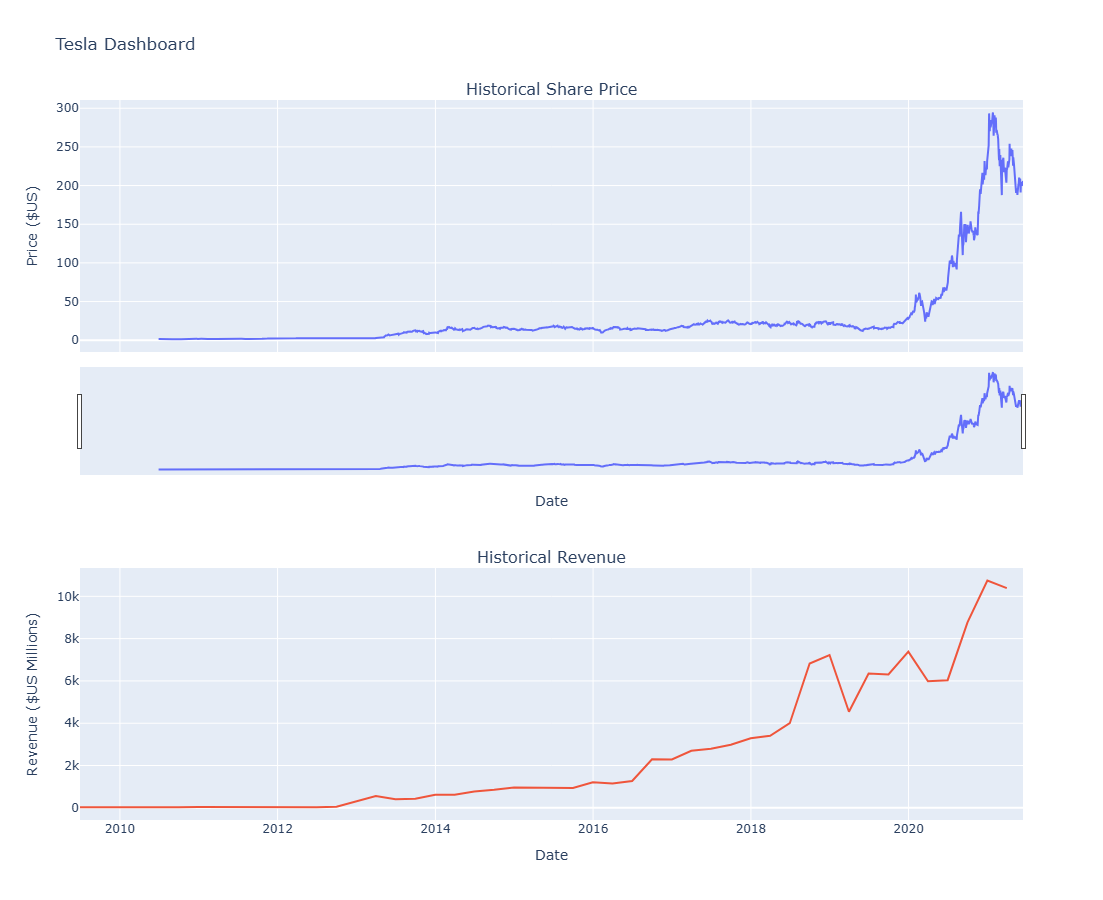

In [73]:
make_graph(tesla_data,tesla_rev_df,"Tesla Dashboard")

Question 6 - GameStop Stock and Revenue Dashboard

C:\Users\tutuf\AppData\Local\Temp\ipykernel_23336\1835765142.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\tutuf\AppData\Local\Temp\ipykernel_23336\1835765142.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



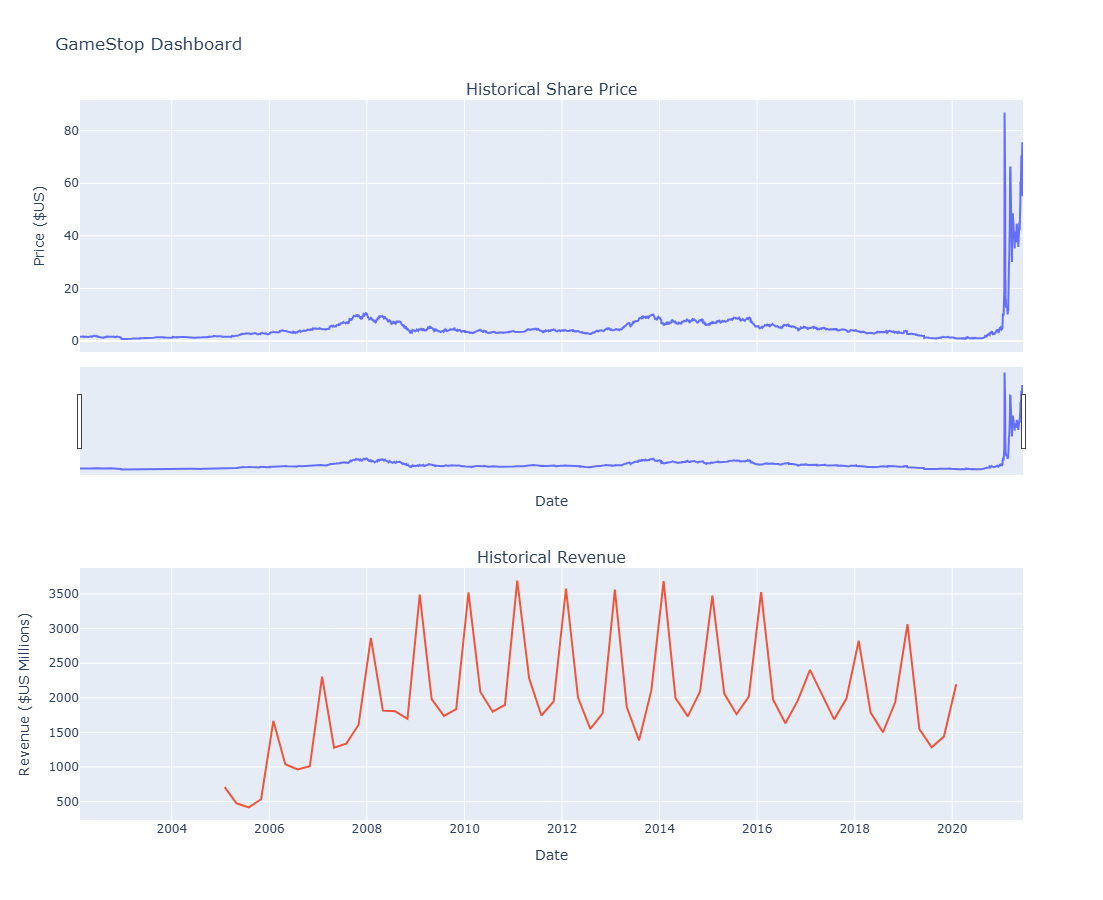

In [74]:
make_graph(gme_data,gme_rev_df,"GameStop Dashboard")